In [1]:
from pytadbit.mapping.full_mapper import full_mapping
import pytadbit


IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [2]:
r_enz = 'BglII'
rep = '1'

In [48]:
print 'Mapping the first end of the read\n'
mapped_r1 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_translo2.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_trans',
                         windows=(1, 40),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=True, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_trans')


Mapping the first end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 1-40
Mapping reads in window 1-40...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_pBaBez
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_translo2.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_t

In [49]:
print 'n\nMapping the second end of the read\n'
mapped_r2 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_translo2.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_trans',
                         windows=(41, 80),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=False, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_trans')


n
Mapping the second end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 41-80
Mapping reads in window 41-80...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_ahsn4Y
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_translo2.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_

In [50]:
from pytadbit.parsers.genome_parser import parse_fasta
from matplotlib import pyplot as plt
import numpy as np

In [51]:
genome_seq = parse_fasta('/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Translo.fa')

Parsing chr1


In [52]:
from pytadbit.mapping.restriction_enzymes import map_re_sites

frags_BglII = map_re_sites('BglII', genome_seq, verbose=True)


Found 700 RE sites


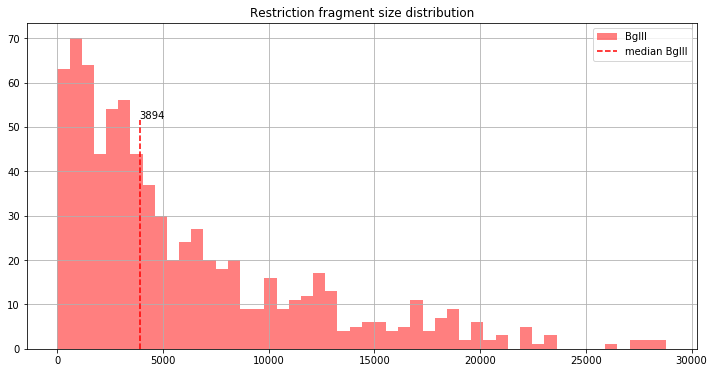

In [53]:
c0 = frags_BglII.keys()[0]
v0 = 0
dists_BglII = []
for c1, v1 in [(c, v) for c in frags_BglII for p in frags_BglII[c] 
               for v in frags_BglII[c][p]]:
    if c1 == c0:
        diff = abs(v1 - v0)
        if diff < 30000:
            dists_BglII.append(diff)
    v0 = v1
    
plt.figure(figsize=(12, 6))
_ = plt.hist([dists_BglII], bins=50, color=['red'], 
             alpha=0.5, label=['BglII'])
y0, y1 = plt.ylim()
plt.vlines(np.median(dists_BglII), y0, y1 * 0.7, color='red', linestyle='--',
          label='median BglII')
plt.text(np.median(dists_BglII), y1 * 0.7, '%.0f' % np.median(dists_BglII), va='bottom', 
         ha='left')
plt.title('Restriction fragment size distribution')
plt.legend()
plt.grid()


In [54]:
maps1 = ['/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map', '/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map']

maps2 = ['/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map', '/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_41-80.map']


In [55]:
reads1 = '/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/02_parsing/reads1.tsv'
reads2 = '/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/02_parsing/reads2.tsv'

In [56]:
from pytadbit.parsers.map_parser import parse_map
print 'Parse MAP files....'
parse_map(maps1, maps2, out_file1=reads1, out_file2=reads2, genome_seq=genome_seq, 
          re_name='BglII', 
          verbose=True)

Parse MAP files....
Searching and mapping RE sites to the reference genome
Found 700 RE sites
Loading read1
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map
Merge sort.................
Getting Multiple contacts
Loading read2
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_

({0: {1: 15558097, 2: 1780888}, 1: {1: 13523482, 2: 1577543}},
 {0: 255758, 1: 183307})

In [57]:
from pytadbit.mapping import get_intersection

In [58]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/03_filtering/reads12.tsv'

In [59]:
get_intersection(reads1, reads2, reads, verbose=True) 


Getting intersection of reads 1 and reads 2:
 
  .......... .......
Found 14689670 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(14689670, {2: 375404, 3: 4})

In [60]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions


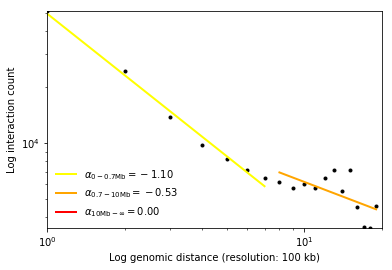

((-1.097932073721829, 10.813884050717917, -0.99510033271916143),
 (-0.5277270409183199, 9.9453754957319482, -0.60208175829964761),
 (0, 0, 0))

In [61]:
plot_distance_vs_interactions(reads, resolution=100000, max_diff=40, show=True)

In [62]:
from pytadbit.mapping.analyze import plot_genomic_distribution

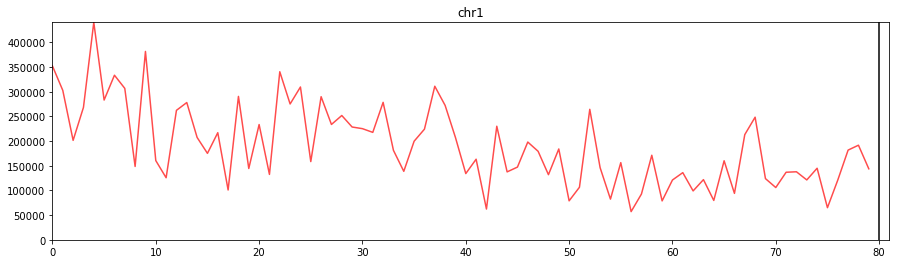

In [63]:
plot_genomic_distribution(reads, resolution=50000,  show=True)

In [16]:
from pytadbit.mapping.analyze import hic_map

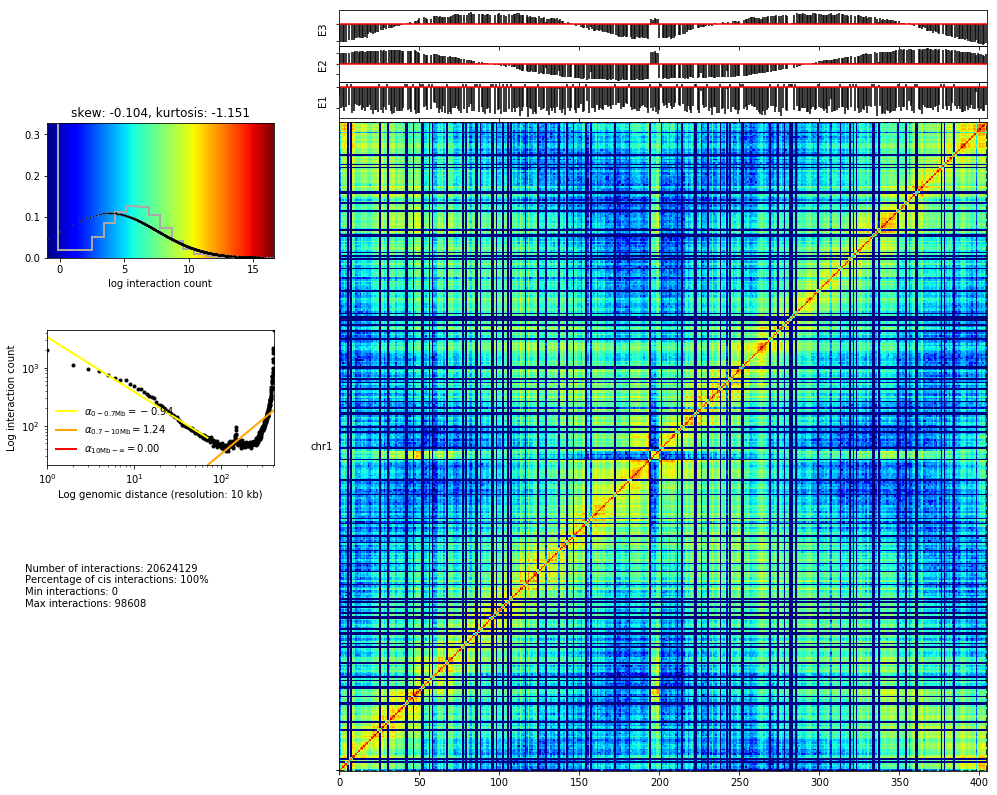

In [65]:
hic_map(reads, resolution=10000, show=True)

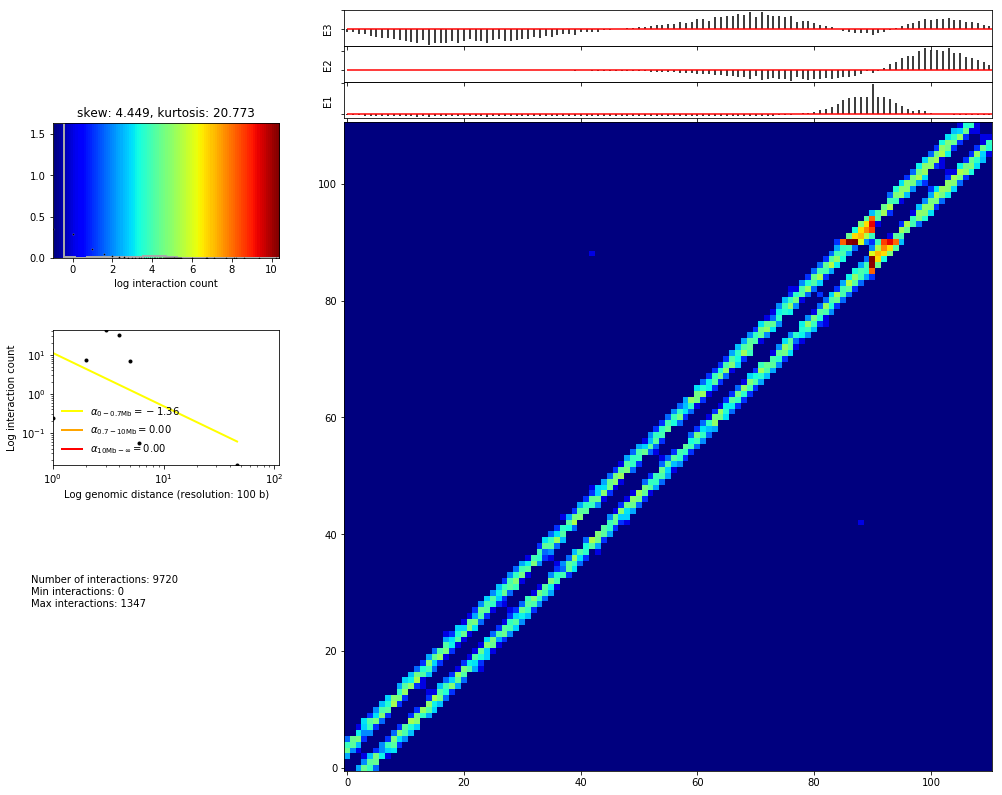

In [71]:
hic_map(reads, resolution=100, focus=(1900, 2010), show=True)

In [68]:
from pytadbit.mapping.analyze import plot_diagonal_distributions

process reads
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
   finished processing 15440498 reads
write to files


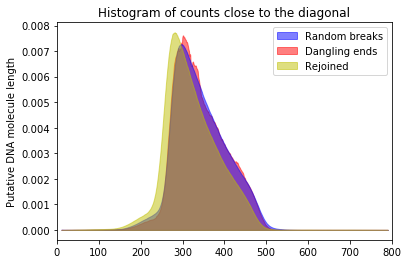

In [70]:
plot_diagonal_distributions(reads, 'yannick_plot')

In [66]:
%matplotlib inline

In [34]:
pwd

u'/home/nikita/Notebook'

In [4]:
print 'Mapping the first end of the read\n'
mapped_r1 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del',
                         windows=(1, 40),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=True, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del')


Mapping the first end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 1-40
Mapping reads in window 1-40...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_PyROli
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del/LaublabBglII

In [5]:
print 'n\nMapping the second end of the read\n'
mapped_r2 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del',
                         windows=(41, 80),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=False, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del')


n
Mapping the second end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 41-80
Mapping reads in window 41-80...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_ob4DdP
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del/Laublab

In [6]:
from pytadbit.parsers.genome_parser import parse_fasta
from matplotlib import pyplot as plt
import numpy as np

In [7]:
genome_seq = parse_fasta('/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Deletion.fa')

Parsing chr1


In [8]:
from pytadbit.mapping.restriction_enzymes import map_re_sites

frags_BglII = map_re_sites('BglII', genome_seq, verbose=True)


Found 690 RE sites


In [9]:
maps1 = ['/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map', '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map']

maps2 = ['/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map', '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_41-80.map']


In [10]:
reads1 = '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/02_parsing/reads1.tsv'
reads2 = '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/02_parsing/reads2.tsv'

In [11]:
from pytadbit.parsers.map_parser import parse_map
print 'Parse MAP files....'
parse_map(maps1, maps2, out_file1=reads1, out_file2=reads2, genome_seq=genome_seq, 
          re_name='BglII', 
          verbose=True)

Parse MAP files....
Searching and mapping RE sites to the reference genome
Found 690 RE sites
Loading read1
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map
Merge sort.................
Getting Multiple contacts
Loading read2
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_Bg

({0: {1: 15323010, 2: 1752925}, 1: {1: 13317375, 2: 1552475}},
 {0: 248010, 1: 177941})

In [12]:
from pytadbit.mapping import get_intersection

In [18]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/03_filtering/reads12.tsv'

In [19]:
get_intersection(reads1, reads2, reads, verbose=True) 


Getting intersection of reads 1 and reads 2:
 
  .......... .......
Found 14330143 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(14330143, {2: 363705, 3: 4})

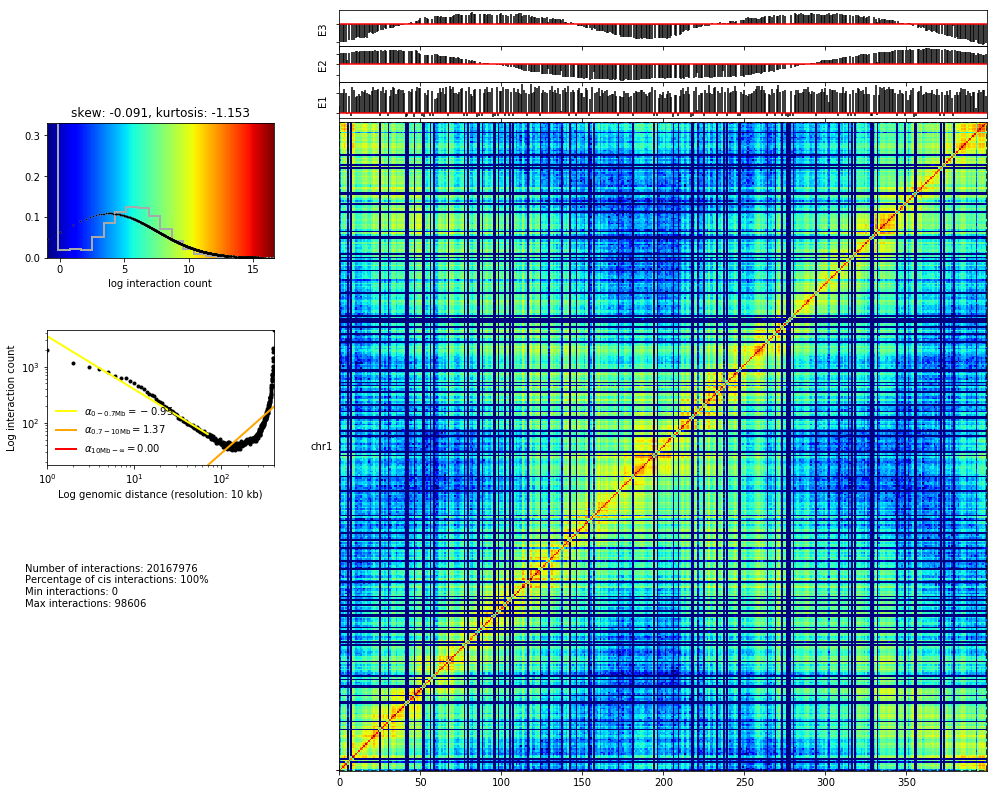

In [20]:
hic_map(reads, resolution=10000, show=True)